In [0]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

data    = np.genfromtxt("/content/drive/My Drive/AssignmentFolder/Assignment06/data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]


In [189]:

degree = 2

X = data[:, :2]

def mapping(X, Y, degree):
    #T0값을 그대로 뽑기 위해    
    polyX = np.ones(X.shape[0])   
    for i in range(1,degree + 1):  
        for j in range(0, i + 1):        
            polyX = np.column_stack((polyX, (X ** (i-j)) * (Y ** j)))
    return polyX

X_poly = mapping(pointX, pointY, degree)

theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)
print(theta.shape)
theta2 = list(itertools.chain(*theta))   
map(float,theta2)
print(len(theta2))

#sigmoid
z = X_poly.dot(theta2)
sigz = 1 / (1 + np.exp(-z))
#error
E_list = []
E = 0
#accuracy
accuracy = 0
accuracy_list = []


alpha = 0.003
iter = 0
l = np.mat(label).T   
size = len(label)     
costList = []     
accuracyList = []    
pre_cost = 0.0    
cost = 0.0
m = label.shape[0]
while True:       
    iter += 1
    theta2 = list(itertools.chain(*theta))   
    map(float,theta2)
    #sigmoid
    z = X_poly.dot(theta2)
    sigz = 1 / (1 + np.exp(-z))

    pre_cost = cost
    z = X_poly.dot(theta)    
    sig = sigmoid(z)
    #cost
    cost = np.sum( np.multiply(-label, np.log(sigz)) - np.multiply((1-label), np.log(1-sigz)) ) / len(label)
    costList.append(cost)
    #accuracy         
    accuracy = (sigz > 0.5)
    accurate = accuracy == label
    accuracyList.append((np.sum(accurate) / size) * 100)
    #gradient part        
    theta_grad = np.dot(X_poly.T,(sig - l)) / m       
    theta -= np.dot(alpha,theta_grad)     
    if abs(pre_cost - cost) < 0.0000001:     
        break 

print(iter)



(6, 1)
6
290723


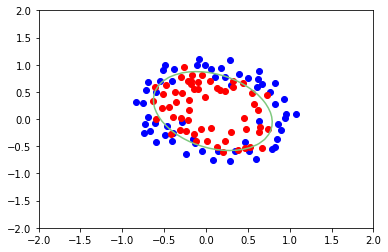

In [184]:
clf = plt.subplot()

x = np.linspace(-2, 2, 50)   
y = np.linspace(-2, 2, 50)    
X, Y = np.meshgrid(x, y) 

X = np.ravel(X)    
Y = np.ravel(Y)        

X_poly = mapping(X, Y, degree)
Z = X_poly.dot(theta)

X = X.reshape((len(x), len(y)))
Y = Y.reshape((len(x), len(y)))
Z = Z.reshape((len(x), len(y)))


clf.contour(X,Y,Z,levels=[0],cmap= "Accent")  

clf.scatter(pointX0, pointY0, c = 'b')
clf.scatter(pointX1, pointY1, c = 'r')

In [168]:
def classifier(theta, degree, axes):   
    x = np.linspace(-2, 2, 50)   
    y = np.linspace(-2, 2, 50)    
    X,Y = np.meshgrid(x,y)    
    X = np.ravel(X)    
    Y = np.ravel(Y)        
    X_poly = mapping(X, Y, degree)    
    Z = X_poly.dot(theta)         
    X = X.reshape((len(x), len(y)))    
    Y = Y.reshape((len(x), len(y)))     
    Z = Z.reshape((len(x), len(y)))       
    cs = axes.contour(X,Y,Z,levels=[0],cmap= "Accent")  
    return cs

def Accuracy(theta):  
    theta = list(itertools.chain(*theta))  
    map(float,theta)   
    correct = 0    
    size = len(Y)    
    z = X_poly.dot(theta)   
    prediction = (sigmoid(z) > 0.5)  
    correct = prediction == label     
    accuracy = (np.sum(correct) / size)*100   
    return accuracy

def AccuracyResult(theta):    
    theta = list(itertools.chain(*theta))   
    map(float,theta)     
    correct = 0     
    size = len(pointY)    
    z = X_poly.dot(theta)  
    prediction = (sigmoid(z) > 0.5) 
    correct = prediction == label   
    my_accuracy = (np.sum(correct) / size)*100  
    print ('Accuracy %: ', my_accuracy)


def train(x_poly,label,theta,rate = 0.003):    
    l = np.mat(label).T   
    size = len(label)     
    costList = []     
    accuracyList = []    
    pre_cost = 0.0    
    cost = 0.0
    m = label.shape[0]
    while True:       
        pre_cost = cost
        z = x_poly.dot(theta)    
        sig = sigmoid(z)
        #cost      
        cost = costFunc(theta,x_poly,label)
        costList.append(cost)
        #accuracy         
        accuracyList.append(Accuracy(theta))   
        #gradient part        
        theta_grad = np.dot(x_poly.T,(sig - l)) / m       
        theta -= np.dot(rate,theta_grad)     
        if abs(pre_cost - cost) < 0.0000001:     
            break     
    return theta, costList, accuracyList

degree = 2 
X = data[:, :2]
y = data[:, 2] 
X_poly = mapping(X[:, 0], X[:, 1], degree)   
# Set initial values for our parameters 
theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)
 
 
theta2, costList, accuracyList = train(X_poly,label,theta)
print(theta2)

[[ 3.69729421]
 [ 2.09978272]
 [ 2.79672869]
 [-8.57978708]
 [-4.71359823]
 [-8.19404951]]


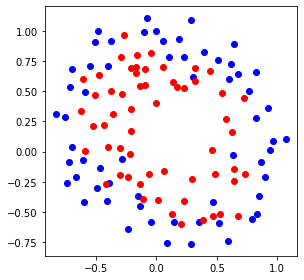

In [46]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


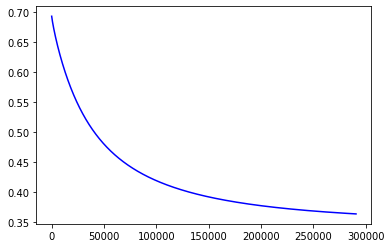

In [171]:

plt.figure() 
plt.plot(costList, 'blue') 
plt.show()
        

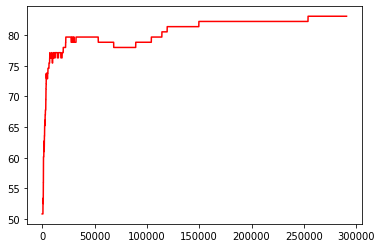

In [180]:
plt.figure() 
plt.plot(accuracyList, 'red') 
plt.show() 

In [115]:
AccuracyResult(theta2)

Accuracy %:  196.0


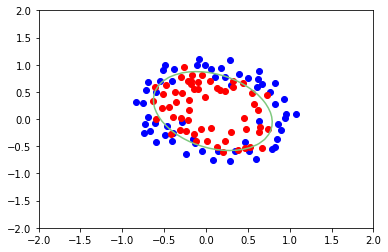

In [148]:
ax = plt.subplot()
ax.scatter(pointX0, pointY0, c = 'b')
ax.scatter(pointX1, pointY1, c = 'r')
classifier(theta2, degree, ax)

1 + $\theta_0x + \theta_0y + \theta_0x^2$

In [0]:
# x y 파트 만들기
def mapping(X1, X2, degree):    
    res = np.ones(X1.shape[0])   
    for i in range(1,degree + 1):  
        for j in range(0,i + 1):        
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    return res

def sigmoid(z):     
    return 1 / (1 + np.exp(-z))

def costFunc(theta, X, label): 
    size = len(label)     
    theta2 = list(itertools.chain(*theta))
    map(float,theta2)   
    z = X.dot(theta2)     
    sig = sigmoid(z)     
    term1 = np.multiply(-label , np.log(sig))     
    term2 = np.multiply((1- label),np.log(1 - sig))     
    J = np.sum(term1 - term2) / size     
    return J



ValueError: ignored

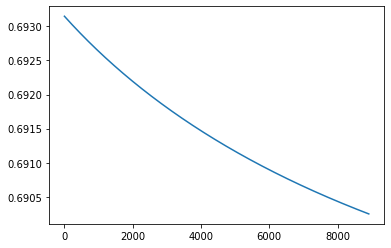

47.45762711864407 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: No contour levels were found within the data range.


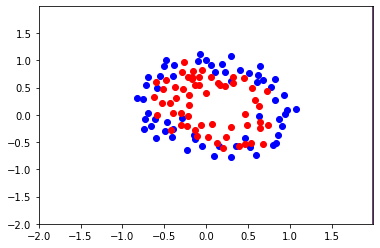

     feature 1  feature 2  faulty
0     0.051267   0.699560       1
1    -0.092742   0.684940       1
2    -0.213710   0.692250       1
3    -0.375000   0.502190       1
4    -0.513250   0.465640       1
..         ...        ...     ...
113  -0.720620   0.538740       0
114  -0.593890   0.494880       0
115  -0.484450   0.999270       0
116  -0.006336   0.999270       0
117   0.632650  -0.030612       0

[118 rows x 3 columns]


     feature 1  feature 2
0     0.051267   0.699560
1    -0.092742   0.684940
2    -0.213710   0.692250
3    -0.375000   0.502190
4    -0.513250   0.465640
..         ...        ...
113  -0.720620   0.538740
114  -0.593890   0.494880
115  -0.484450   0.999270
116  -0.006336   0.999270
117   0.632650  -0.030612

[118 rows x 2 columns]


[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01  2.62830529e-03
   3.58643425e-02  4.89384194e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01  8.60107856e-03
  -6.35227055e-02  4.69142804e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01  4.56719641e-02
  -1.47940748e-01  4.79210063e-01]
 [ 1.00000000e+00 -3.75000000e-01  5.02190000e-01  1.40625000e-01
  -1.88321250e-01  2.52194796e-01]
 [ 1.00000000e+00 -5.13250000e-01  4.65640000e-01  2.63425562e-01
  -2.38989730e-01  2.16820610e-01]
 [ 1.00000000e+00 -5.24770000e-01  2.09800000e-01  2.75383553e-01
  -1.10096746e-01  4.40160400e-02]
 [ 1.00000000e+00 -3.98040000e-01  3.43570000e-02  1.58435842e-01
  -1.36754603e-02  1.18040345e-03]
 [ 1.00000000e+00 -3.05880000e-01 -1.92250000e-01  9.35625744e-02
   5.88054300e-02  3.69600625e-02]
 [ 1.00000000e+00  1.67050000e-02 -4.04240000e-01  2.79057025e-04
  -6.75282920e-03  1.63409978e-01]
 [ 1.00000000e+00  1.31910000e-01 -5.13890000e-01  1.74002481e-02
  -6.77872299e-02  2.6408

0      1
1      1
2      1
3      1
4      1
      ..
113    0
114    0
115    0
116    0
117    0
Name: faulty, Length: 118, dtype: int64


[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


      fun: 0.3481053134837062
 hess_inv: array([[  86.09015478,   45.69937239,   57.70980073, -169.86502598,
         -98.08543715, -188.49248817],
       [  45.69937239,   68.40066475,   48.15475832, -116.02697617,
        -104.73818092, -106.67987971],
       [  57.70980073,   48.15475832,   80.49068721, -115.18656816,
        -110.56696173, -168.07171388],
       [-169.86502598, -116.02697617, -115.18656816,  456.16490361,
         262.19724812,  341.18465705],
       [ -98.08543715, -104.73818092, -110.56696173,  262.19724812,
         396.58347747,  279.42148654],
       [-188.49248817, -106.67987971, -168.07171388,  341.18465705,
         279.42148654,  517.10475017]])
      jac: array([-6.00516796e-06, -2.49594450e-07, -9.72300768e-07, -2.18674541e-06,
       -8.19563866e-07, -1.27404928e-06])
  message: 'Optimization terminated successfully.'
     nfev: 352
      nit: 42
     njev: 44
   status: 0
  success: True
        x: array([  5.16953224,   3.24770444,   4.16640797, -12.0

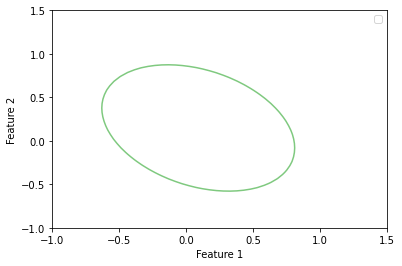